In [2]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from experiment import experiment
from utils import *
from data import load_data
import warnings
warnings.filterwarnings("ignore")

In [3]:
X, y, Z = load_data()

Continuous (1000, 7)
Class (1000,)
Categorical (1000, 13)
700
300
(1000, 21)


In [4]:
missing_range = [.20, .35, .50, .65, .8]
res = dict()
for v in missing_range:
  res[v] = experiment(X,y,Z,v,1)[0]


Imputing row 1/1000 with 0 missing, elapsed time: 0.169
Imputing row 101/1000 with 2 missing, elapsed time: 0.173
Imputing row 201/1000 with 0 missing, elapsed time: 0.175
Imputing row 301/1000 with 1 missing, elapsed time: 0.177
Imputing row 401/1000 with 2 missing, elapsed time: 0.181
Imputing row 501/1000 with 2 missing, elapsed time: 0.184
Imputing row 601/1000 with 0 missing, elapsed time: 0.186
Imputing row 701/1000 with 2 missing, elapsed time: 0.189
Imputing row 801/1000 with 4 missing, elapsed time: 0.192
Imputing row 901/1000 with 2 missing, elapsed time: 0.195
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 140
[LightGBM] [Info] Number of data points in the train set: 254, number of used features: 6
[LightGBM] [Info] Start training from score 0.005435
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

In [5]:
from matplotlib.colors import LinearSegmentedColormap

def plot(Ss, colors, t='correlation', g=0):
    cmap = LinearSegmentedColormap.from_list('', colors)
    diff_matrix = defaultdict(list)
    corrmx = defaultdict(list)

    sns.set(rc = {'axes.facecolor': '#F1F1F1', 'figure.facecolor': '#F1F1F1'})
    # Create a figure with subplots
    fig, axs = plt.subplots(ncols=7,nrows=5, figsize=(21, 15))
    # Plot each correlation matrix on the appropriate subplot
    for row, missing_rate in enumerate(Ss.keys()):
        matrix = Ss[missing_rate][0]
        for col in range(len(matrix)):
            corrmx[missing_rate].append(convert_cov_to_corr(matrix[col][g]))
            if t == 'mse_corr':
                mse_mx = cal_mse(corrmx[missing_rate][0], corrmx[missing_rate][col])
                diff_matrix[missing_rate].append(mse_mx)
                vmax = 0.3
            elif t == 'sub_corr':
                sub_mx = cal_sub(corrmx[missing_rate][0], corrmx[missing_rate][col])
                diff_matrix[missing_rate].append(sub_mx)
                vmax = 0.5
            else:
                diff_matrix[missing_rate] = corrmx[missing_rate]
                
            # Create a mask for the upper triangle
            mask = np.tril(np.ones_like(diff_matrix[missing_rate][0], dtype=bool), k=-1)
            if t == 'correlation':
                im = sns.heatmap(diff_matrix[missing_rate][col], cmap=cmap, cbar=False, ax=axs[row, col],vmin=-1, vmax=1, mask=mask)
            else:
                im = sns.heatmap(diff_matrix[missing_rate][col], cmap=cmap, cbar=False, ax=axs[row, col], vmax=vmax, mask=mask)
            

        axs[row,0].set_ylabel(f'{missing_rate*100}%')
    cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
    fig.colorbar(im.get_children()[0], cax=cbar_ax)

        
    algs = ["Ground Truth", "DPERC", "DPER" ,"missForest", "KNN", "Soft-Impute", "MICE"]
    for j in range(len(algs)):
        axs[0, j].set_title(f'{algs[j]}', fontsize=14)

    title = 'Correlation Heatmaps'
    if t == 'mse_corr':
        title = 'Local MSE Difference Heatmaps for Correlation'
    elif t == 'sub_corr':
        title = 'Local Difference (Matrix Subtraction) Heatmaps for Correlation'
        # Add a title for the entire figure
    fig.suptitle(f'{title}', fontsize=16)

        # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

        # Hide the ticks and labels on all subplots
    for ax in axs.flat:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

    # save pic
    plt.savefig(f'plots/Statlog/{g}/{t}.png',dpi=300)
    # plot pic
    plt.show()

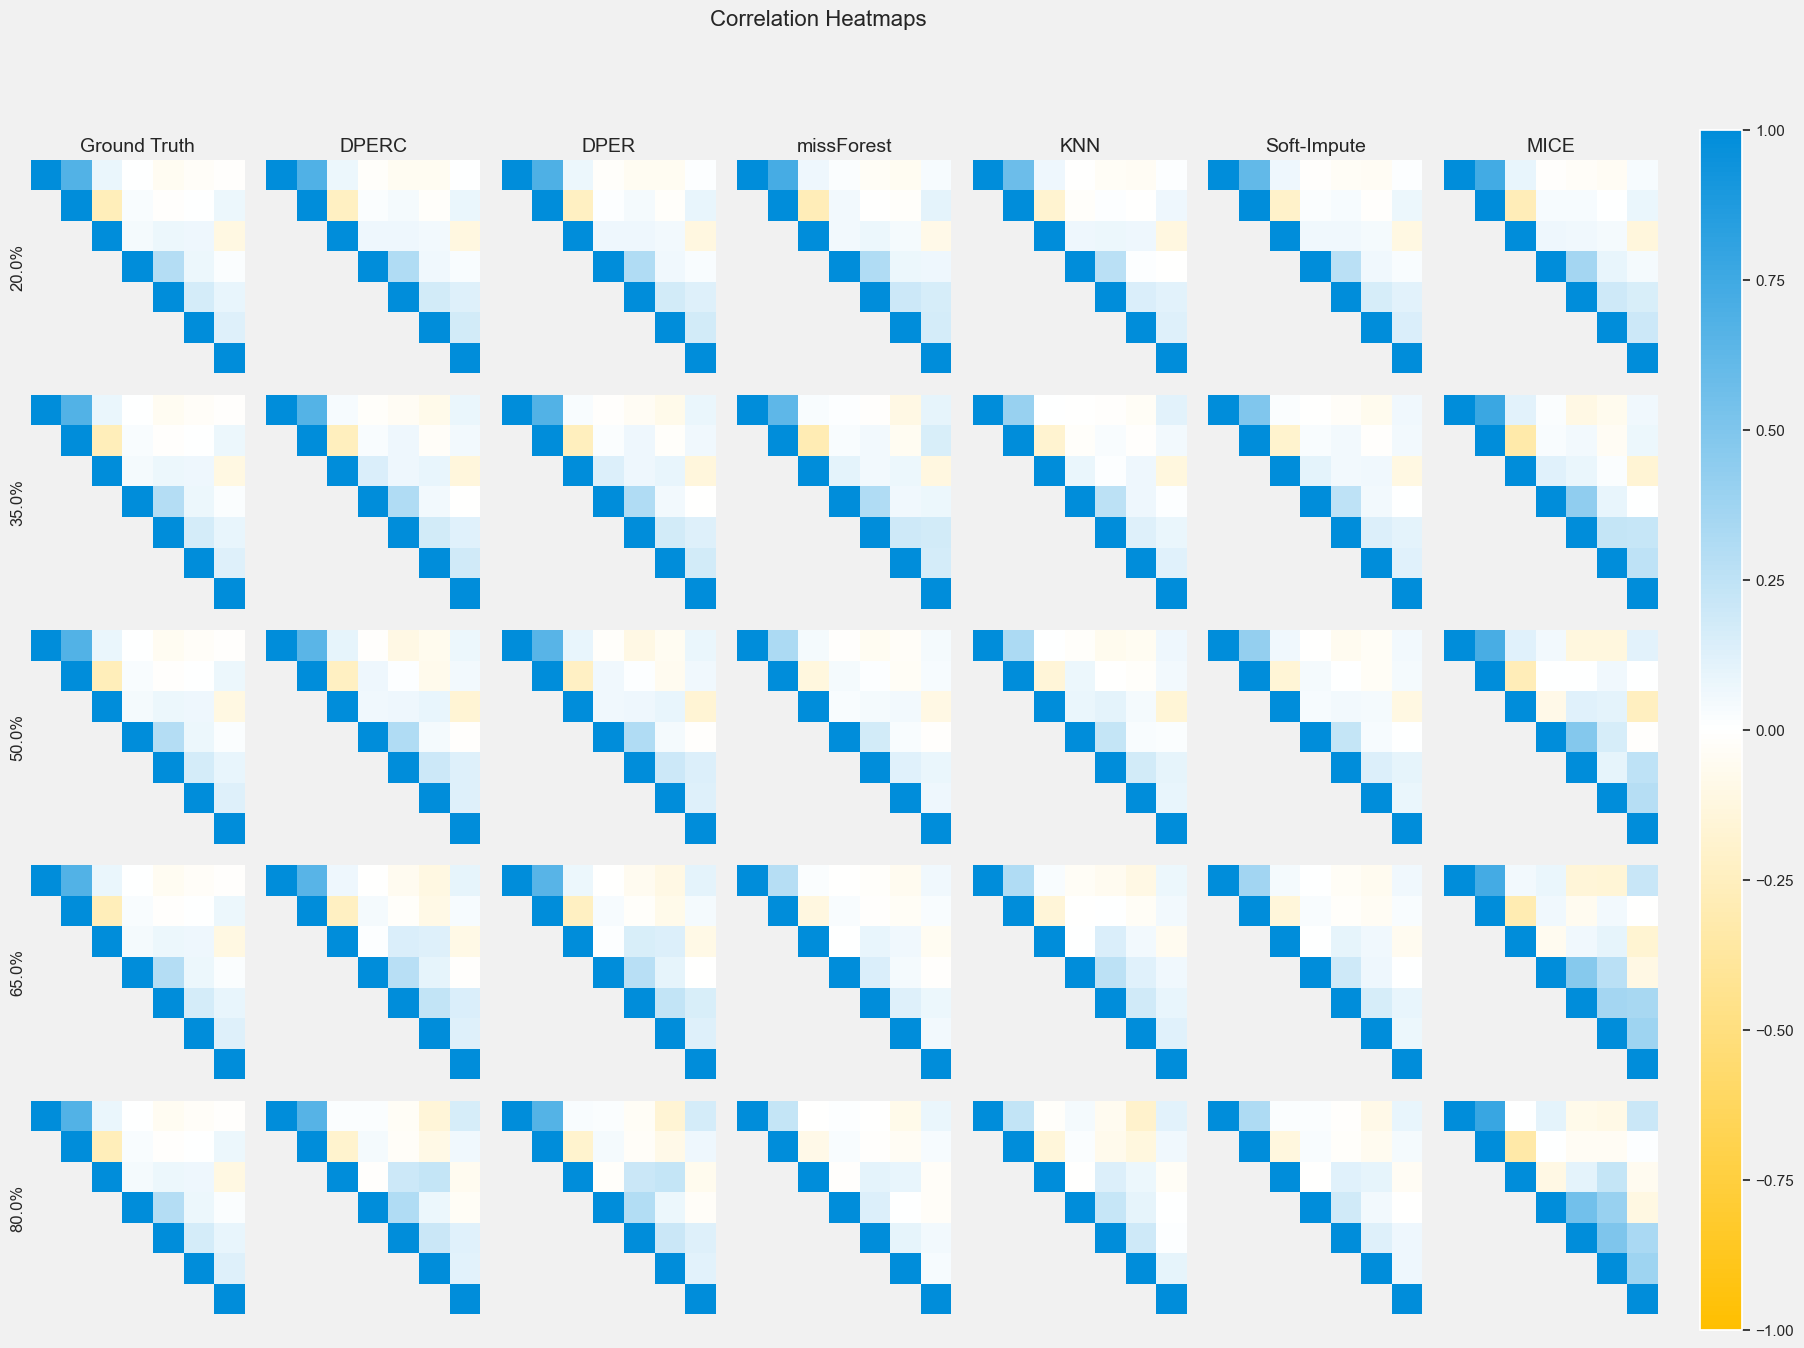

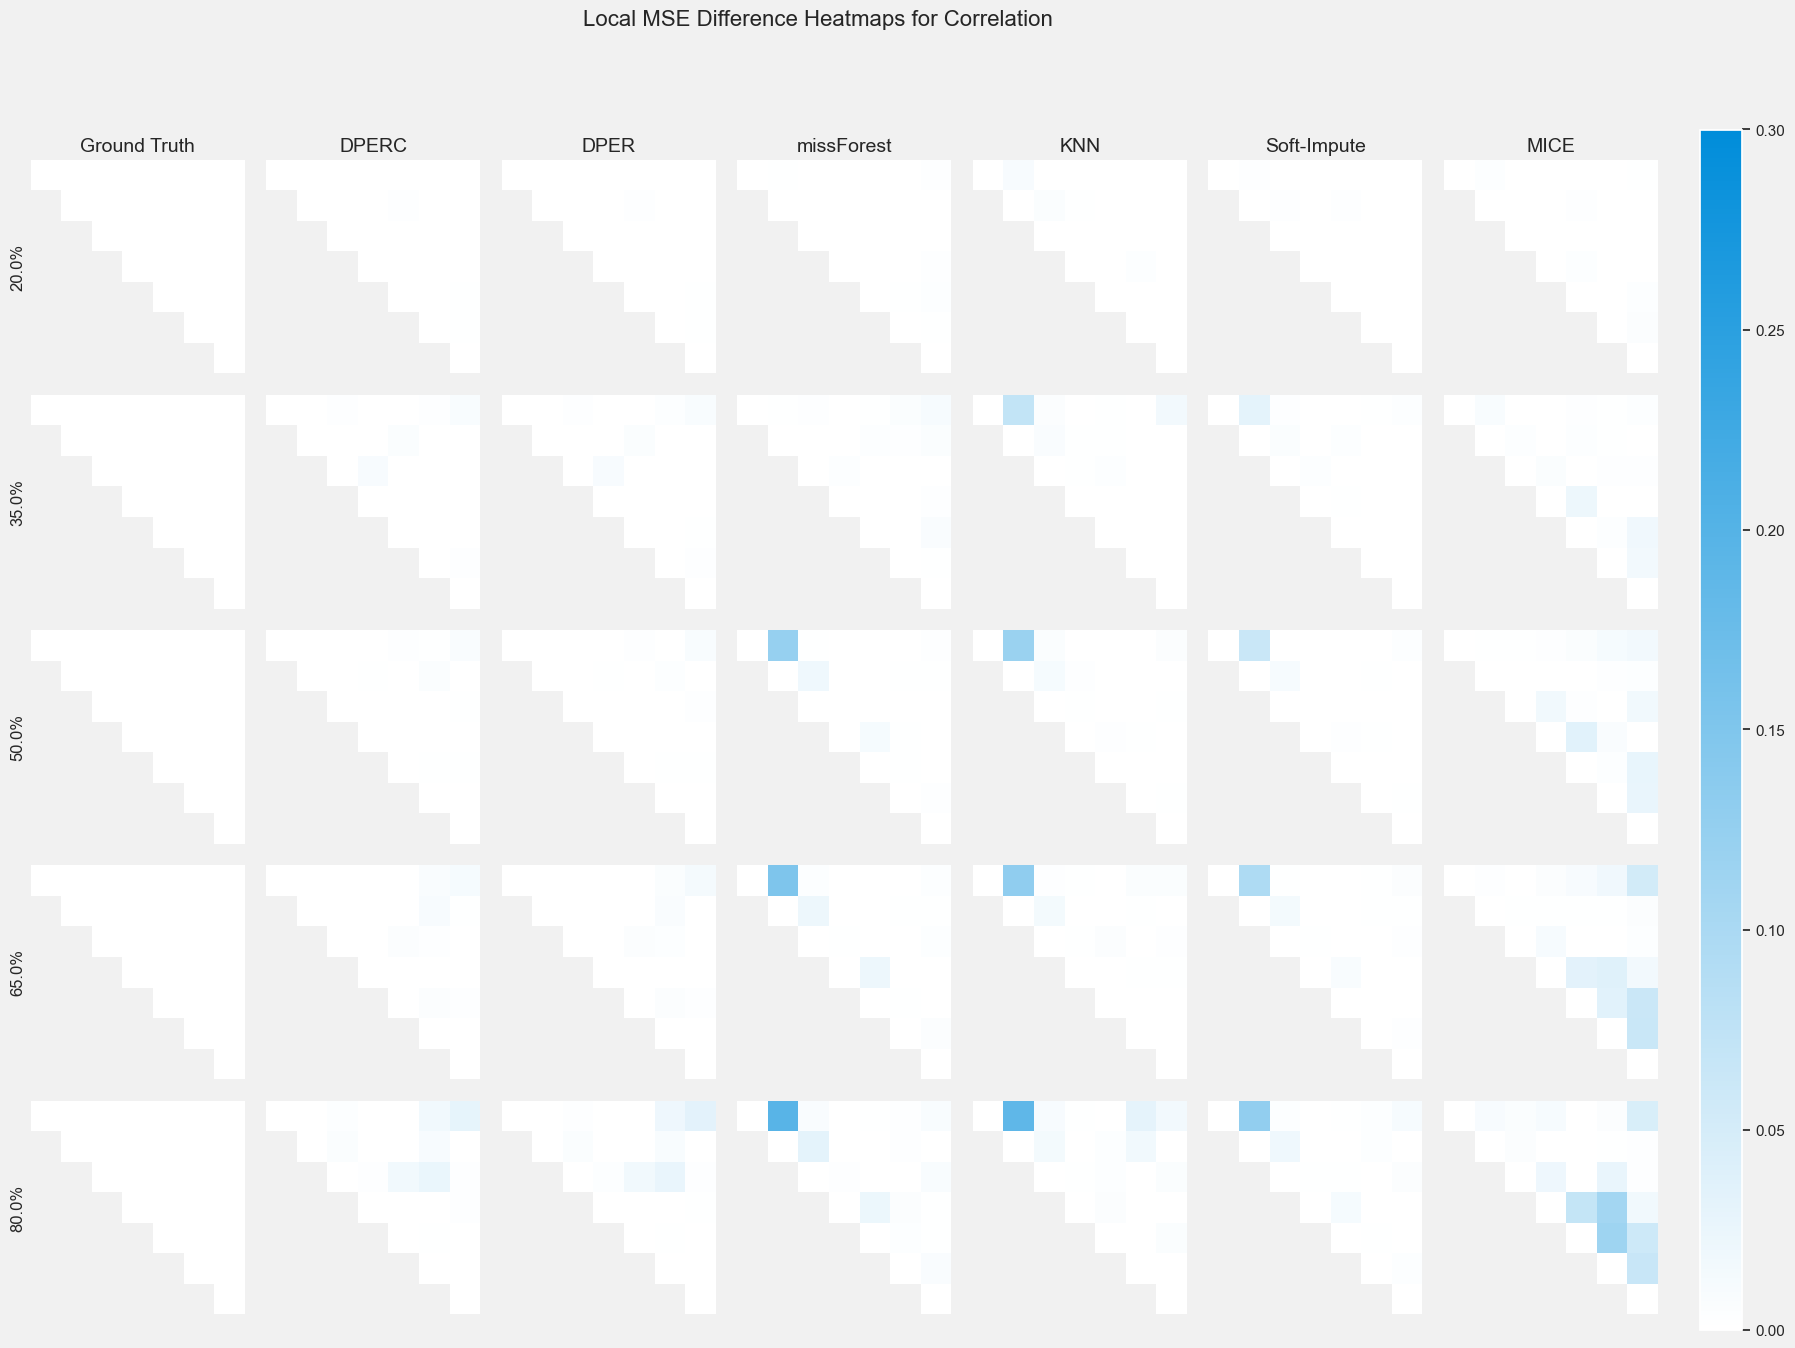

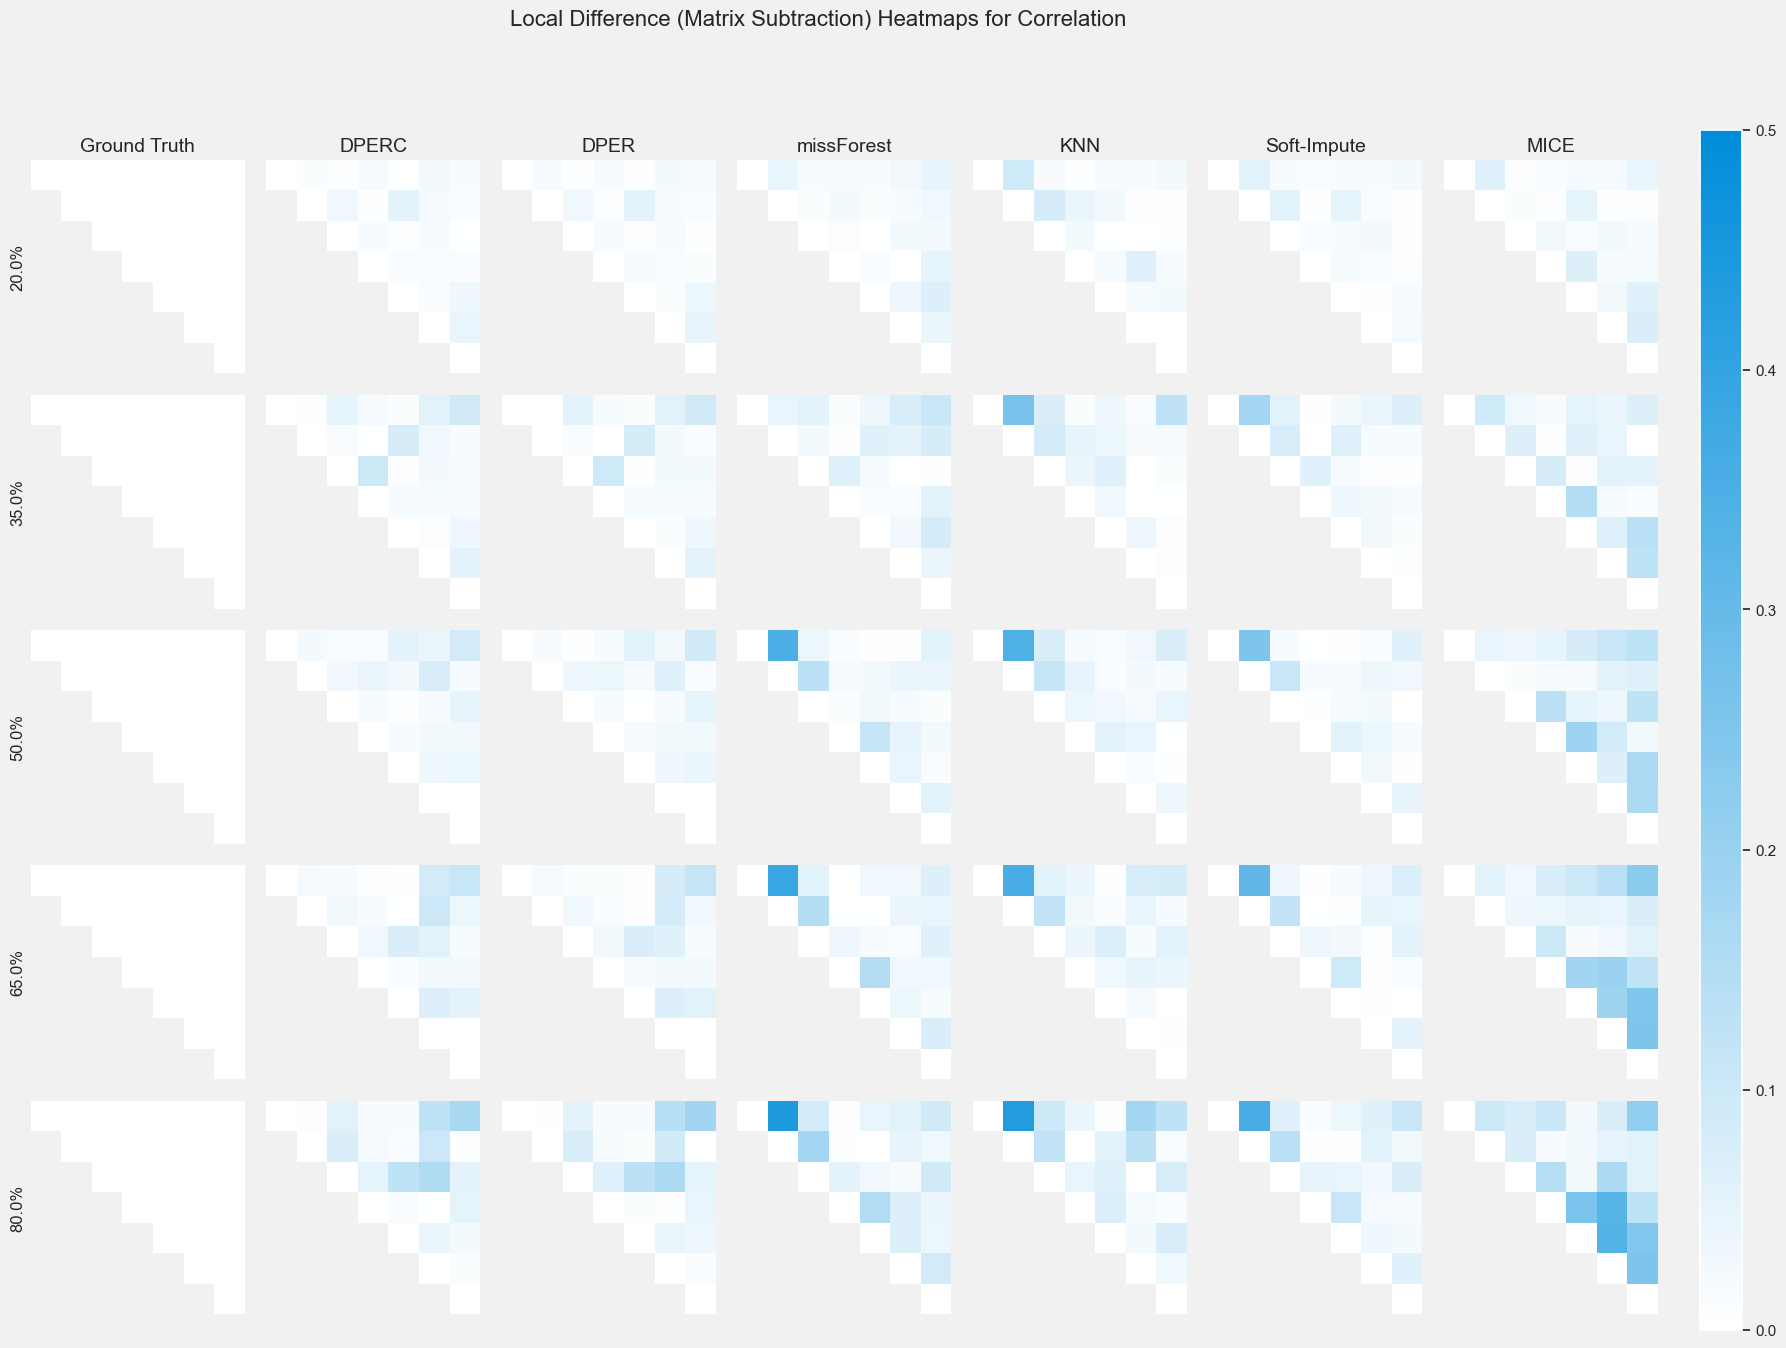

In [9]:
#### class = 0
colors = ["#FFBF00", "#FFFFFF", "#008DDA"]
# Plot correlation heatmaps
plot(res, colors)

mse_colors = ["#FFFFFF", "#008DDA"]
# plot MSE heatmaps
plot(res, mse_colors, t='mse_corr')

# plot subtraction heatmaps
plot(res, mse_colors, t='sub_corr')

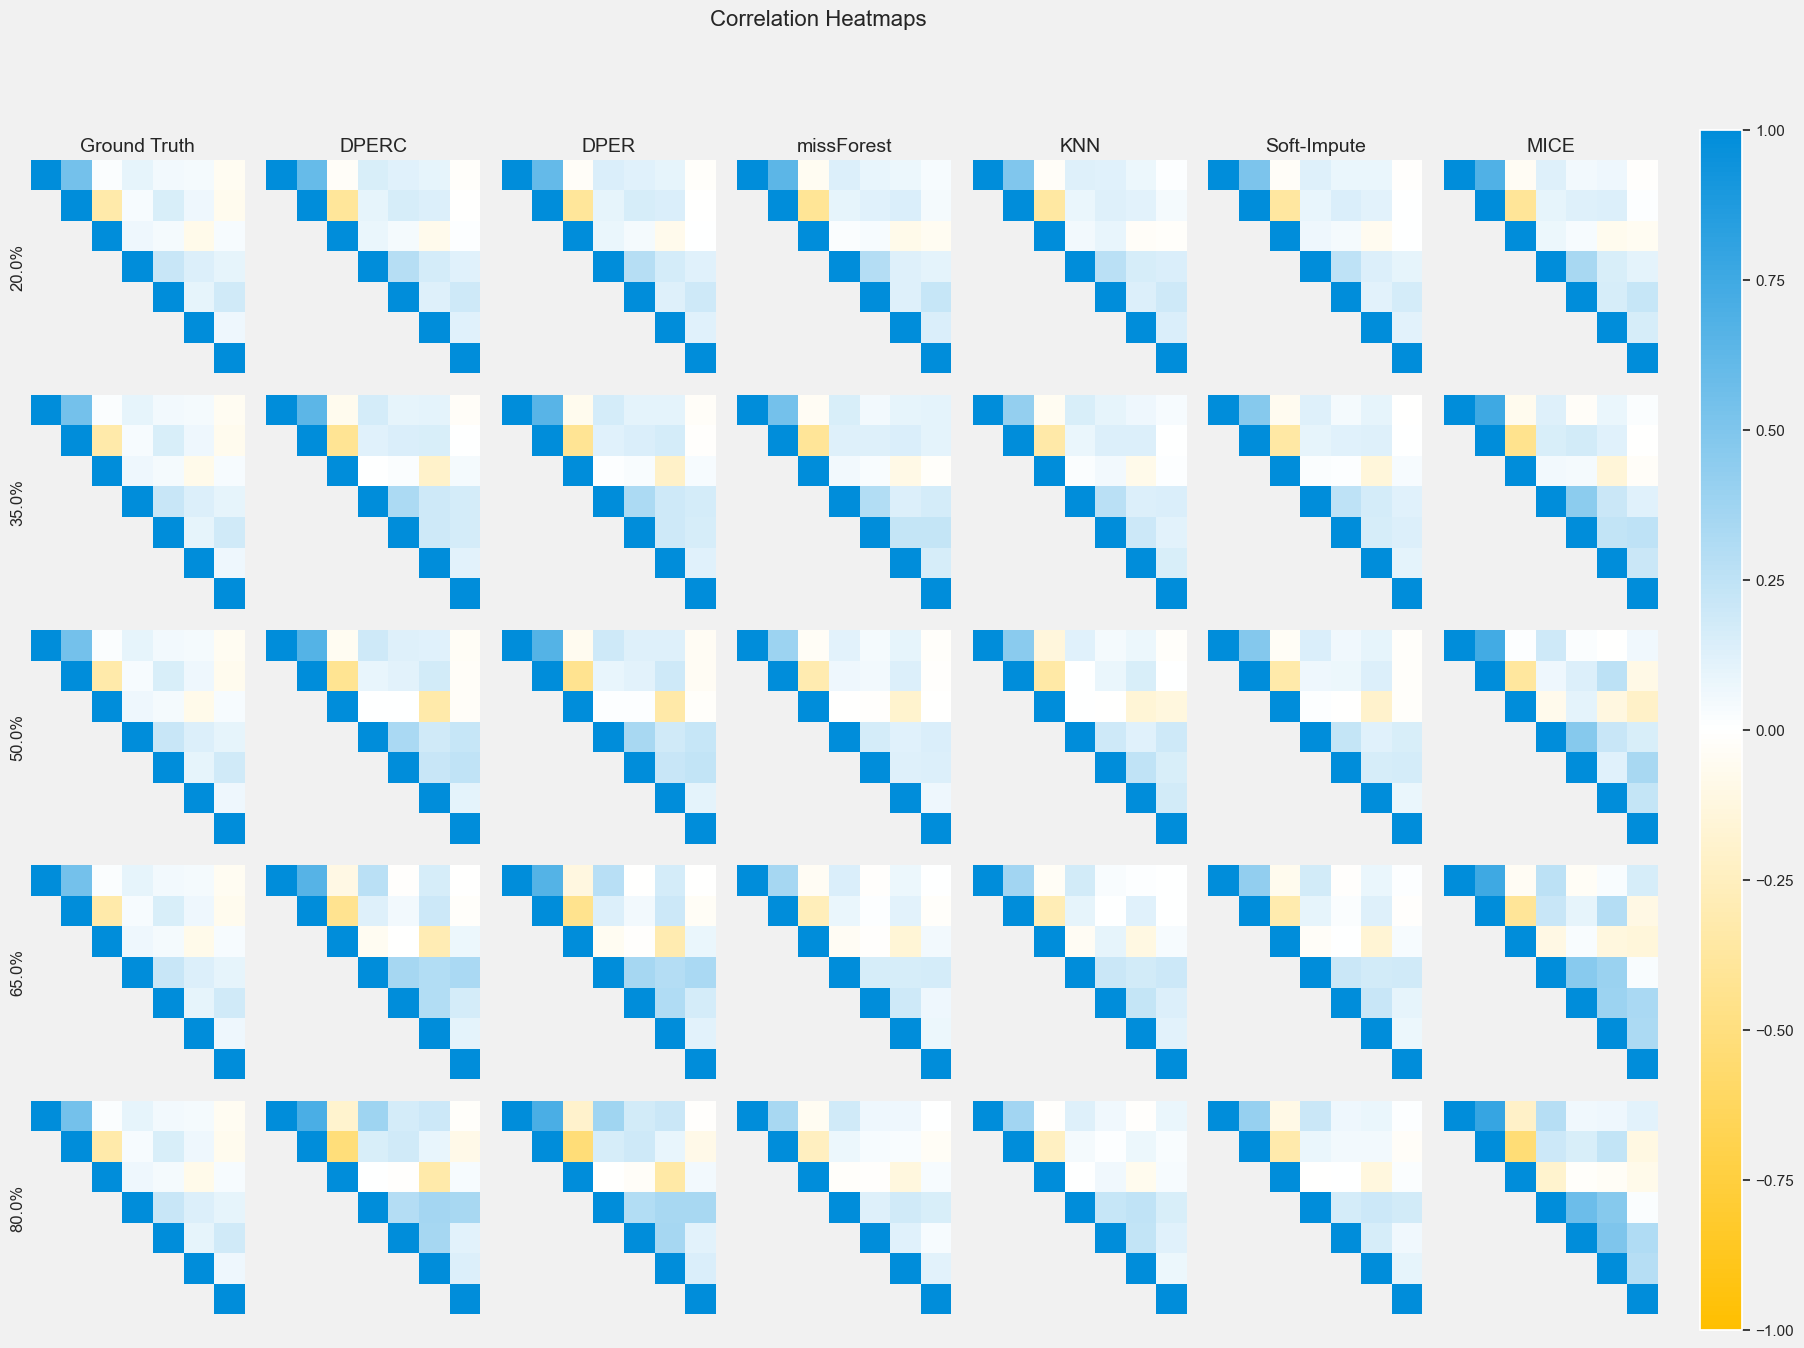

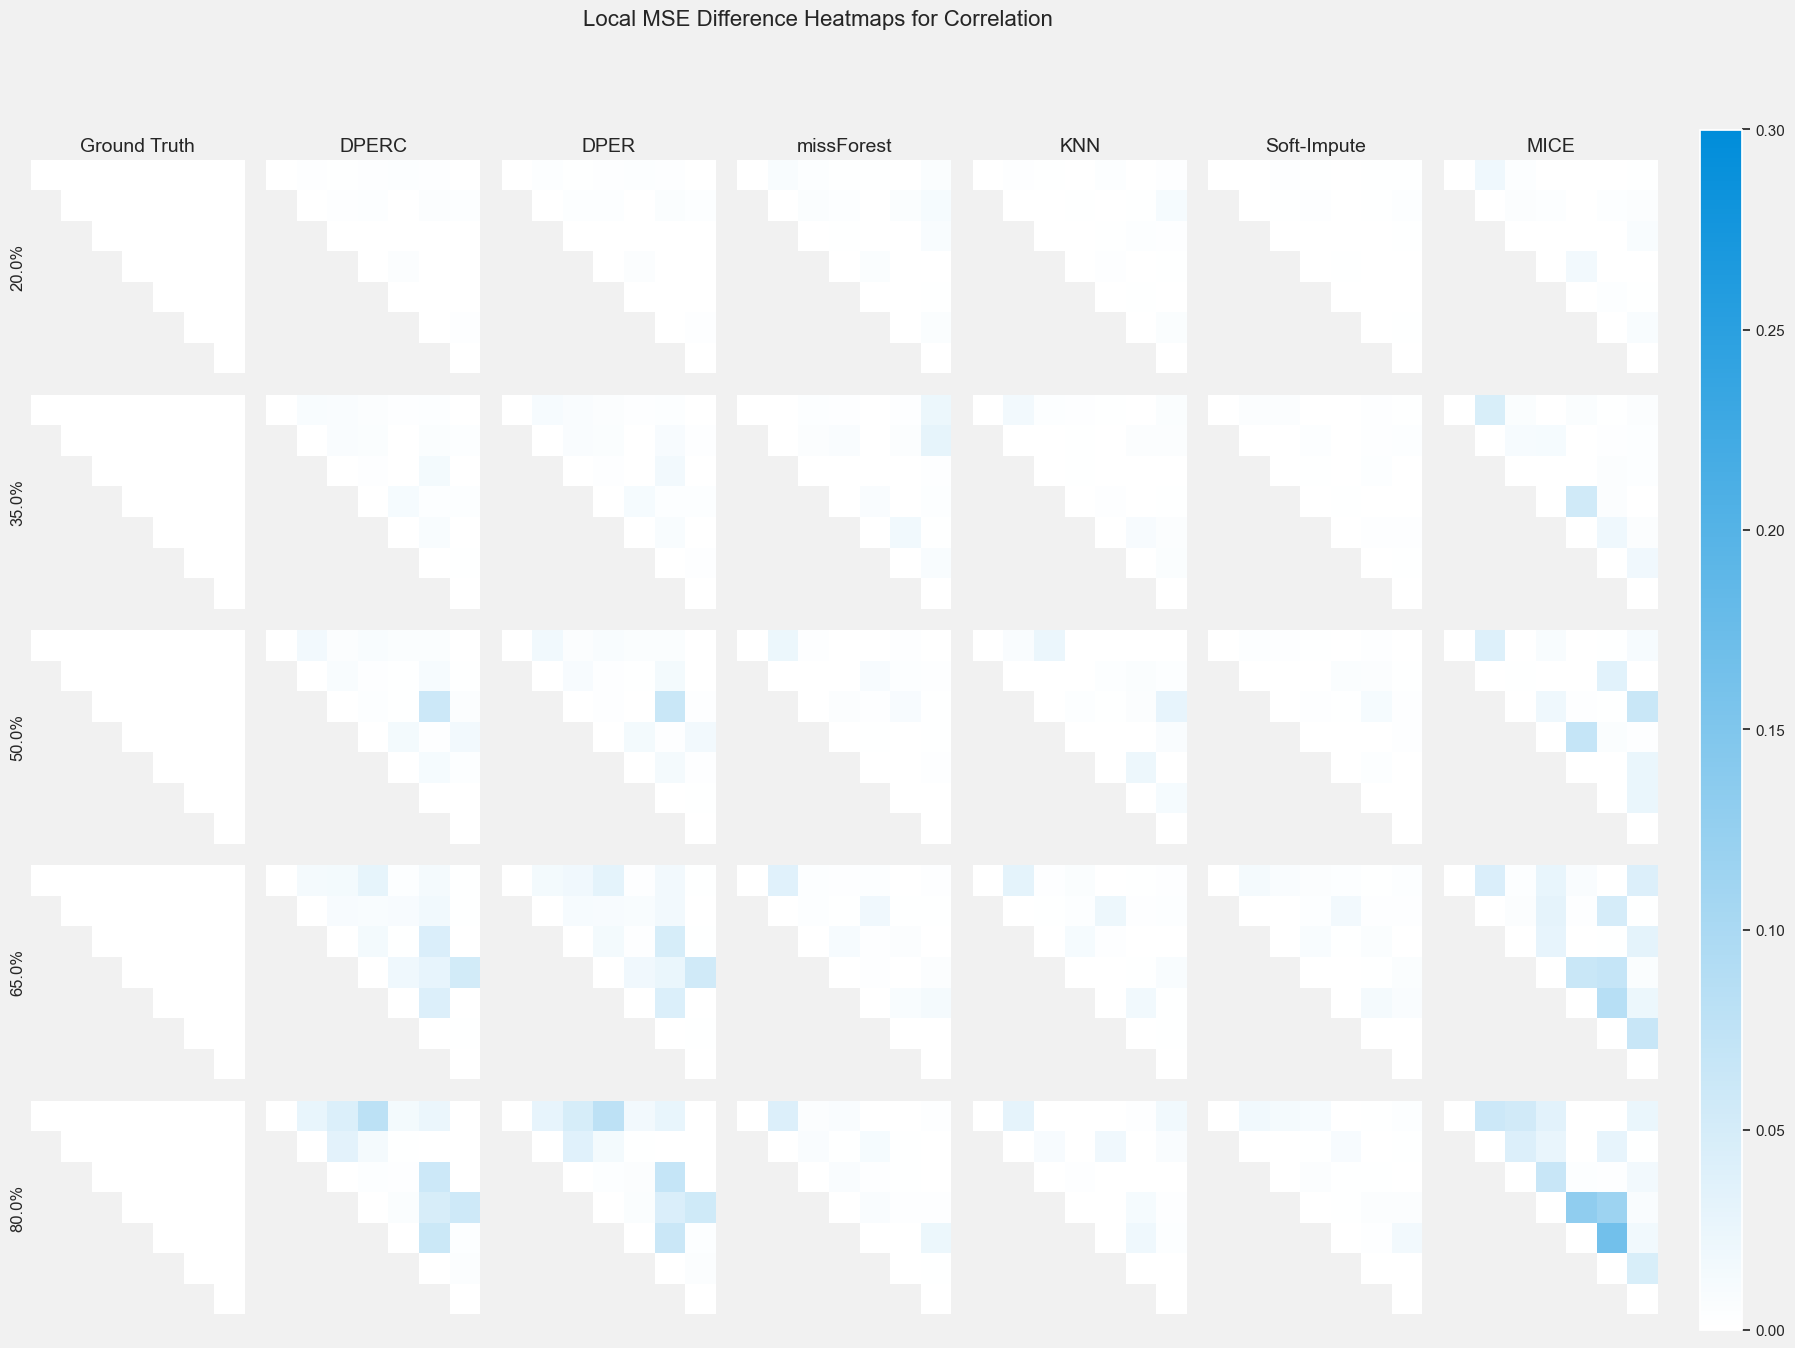

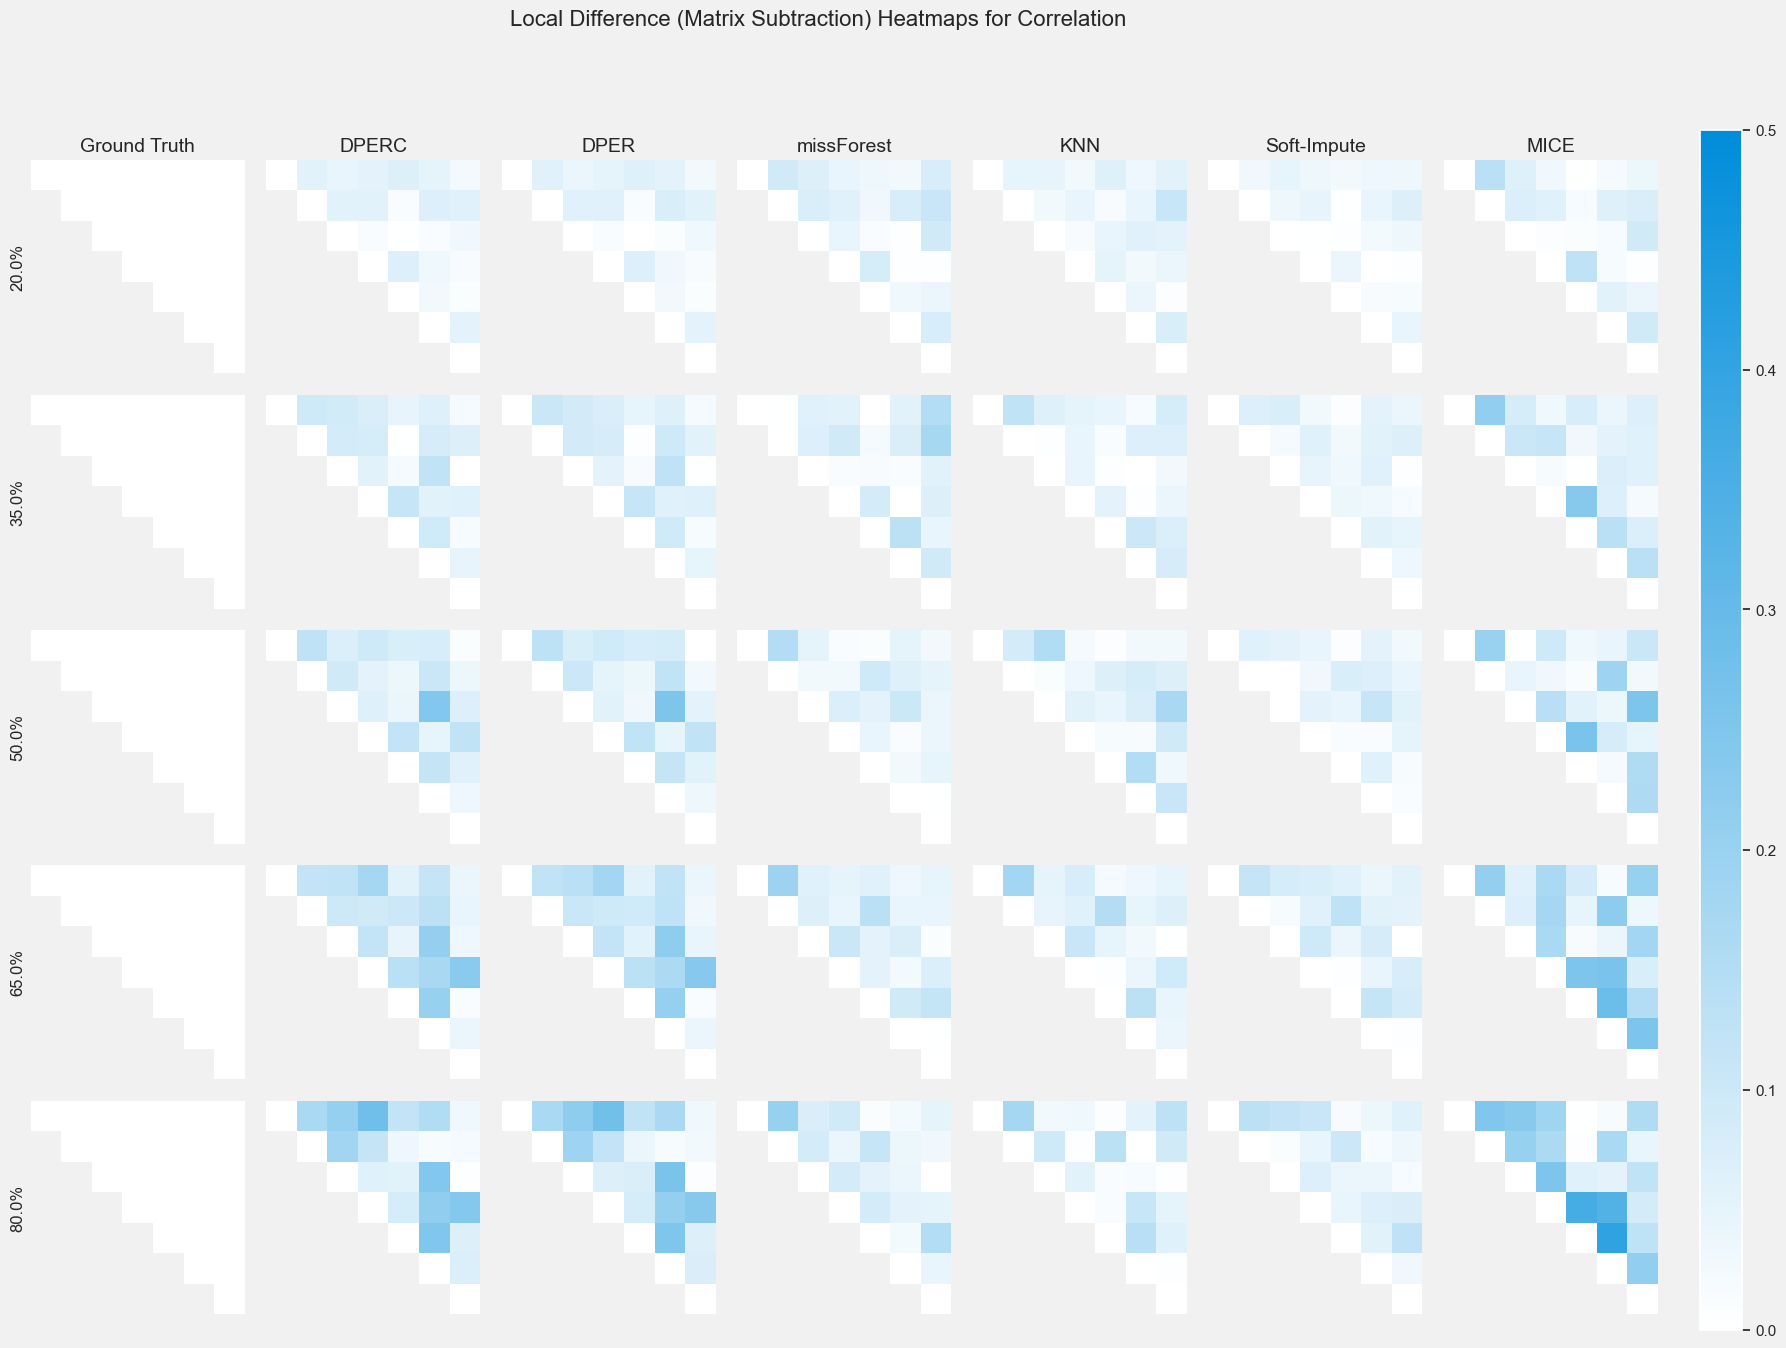

In [10]:
#### class = 1
# Plot correlation heatmaps
plot(res, colors, g=1)

# plot MSE heatmaps
plot(res, mse_colors, t='mse_corr', g=1)

# plot subtraction heatmaps
plot(res, mse_colors, t='sub_corr', g=1)